In [53]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# File to Load (Remember to change these)
city_data_to_load = "Pyber/data/city_data.csv"
ride_data_to_load = "Pyber/data/ride_data.csv"


# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_data_complete_df = pd.merge(city_data, ride_data, how="inner", on=["city", "city"])


# Display the data table for preview

city_data_complete_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [54]:
average_fare_per_city = city_data_complete_df.groupby(["city","type"]).fare.mean()
average_fare_per_city.head()

city           type    
Amandaburgh    Urban       24.641667
Barajasview    Urban       25.332273
Barronchester  Suburban    36.422500
Bethanyland    Suburban    32.956111
Bradshawfurt   Rural       40.064000
Name: fare, dtype: float64

In [55]:
#total rides per city
rides_by_city = city_data_complete_df.groupby(["city","type"]).ride_id.count()
rides_by_city.head()

city           type    
Amandaburgh    Urban       18
Barajasview    Urban       22
Barronchester  Suburban    16
Bethanyland    Suburban    18
Bradshawfurt   Rural       10
Name: ride_id, dtype: int64

In [56]:
#total drivers per city
drivers_by_city = city_data_complete_df.groupby(["city","type"]).driver_count.mean()
drivers_by_city.head()



city           type    
Amandaburgh    Urban       12
Barajasview    Urban       26
Barronchester  Suburban    11
Bethanyland    Suburban    22
Bradshawfurt   Rural        7
Name: driver_count, dtype: int64

In [57]:
city_data_chart=pd.DataFrame({
    'Average Fare': average_fare_per_city,
    'Total Drivers': total_drivers,
    'Total Rides': rides_by_city
})

city_data_chart=city_data_chart.reset_index()
city_data_chart.head()
city_data_types=['Urban', 'Suburban','Rural']

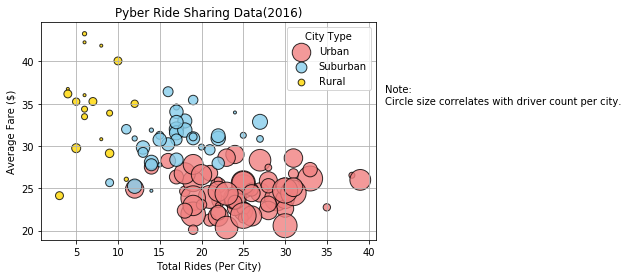

In [58]:
y1=city_data_complete_df.loc[city_data_complete_df['type']=='Urban'].groupby(['city','type']).fare.mean()
y2=city_data_complete_df.loc[city_data_complete_df['type']=='Suburban'].groupby(['city','type']).fare.mean()
y3=city_data_complete_df.loc[city_data_complete_df['type']=='Rural'].groupby(['city','type']).fare.mean()

z1=city_data_complete_df.loc[city_data_complete_df['type']=='Urban'].groupby(['city','type']).driver_count.mean()
z2=city_data_complete_df.loc[city_data_complete_df['type']=='Suburban'].groupby(['city','type']).driver_count.mean()
z3=city_data_complete_df.loc[city_data_complete_df['type']=='Rural'].groupby(['city','type']).driver_count.mean()

x1=city_data_complete_df.loc[city_data_complete_df['type']=='Urban'].groupby(['city','type']).ride_id.count()
x2=city_data_complete_df.loc[city_data_complete_df['type']=='Suburban'].groupby(['city','type']).ride_id.count()
x3=city_data_complete_df.loc[city_data_complete_df['type']=='Rural'].groupby(['city','type']).ride_id.count()

plt.scatter(x1,y1,s=9*z1,c="lightcoral",alpha=.8,edgecolors="black",label="Urban")
plt.scatter(x2,y2,s=9*z2,c="skyblue",alpha=.8,edgecolors="black",label="Suburban")
plt.scatter(x3,y3,s=9*z3,c="gold",alpha=.8,edgecolors="black",label="Rural")
plt.legend(title="City Type")
plt.xlabel("Total Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data(2016)")

plt.text(42,35, "Note: \nCircle size correlates with driver count per city.", fontsize =10)
plt.grid()

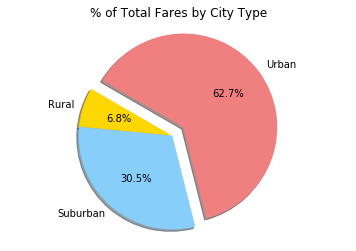

In [59]:
# % of Total Fares by City Type

# Calculate total fare per city type
total_fare_pertype = city_data_complete_df.groupby(["type"])

total_fare_percity=total_fare_pertype["fare"].sum()
total_fare_percity
                                
total_fare=city_data_complete_df['fare'].sum()
total_fare

# Build pie Chart
shades={"Urban":"coral","Suburban": "skyblue", "Rural": "gold"}
pie_types=['Rural','Suburban','Urban']
piechart1_df=pd.DataFrame(total_fare_percity/total_fare*100)
piechart1_df

colors_pie=['gold','lightskyblue','lightcoral']
plt.title("% of Total Fares by City Type")
plt.pie(x=piechart1_df['fare'], labels=pie_types, explode= [0, 0, 0.15], colors= colors_pie,
      autopct="%.1f%%", shadow=True, startangle=150)
plt.axis("equal")

#save figure
plt.savefig("TotalFaresbyCityType.png")

plt.show()



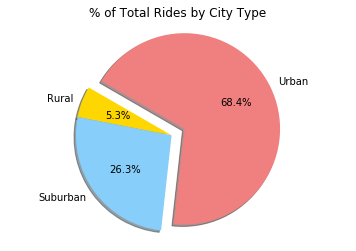

In [60]:
# % of total rides per city type

# calculate total rides per city type


total_rides_percity = city_data_complete_df.groupby('type').ride_id.count()
total_rides_percity

total_rides=city_data_complete_df["ride_id"].count()
total_rides

# Build pie Chart
shades={"Urban":"coral","Suburban": "skyblue", "Rural": "gold"}
#pie_types=['Rural','Suburban','Urban']
piechart2_df=pd.DataFrame(total_rides_percity/total_rides*100)
piechart2_df

colors_pie=['gold','lightskyblue','lightcoral']
plt.title("% of Total Rides by City Type")
plt.pie(x=piechart2_df['ride_id'], labels=pie_types, explode= [0, 0, 0.15],colors= colors_pie,
      autopct="%.1f%%", shadow=True, startangle=150)
plt.axis("equal")

#save figure
plt.savefig("TotalRidesbyCityType.png")

plt.show()

    
    

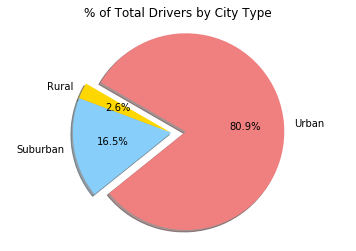

In [61]:
# % of total drivers per city type

#total drivers per city type


total_drivers_pertype =city_data_complete_df.drop_duplicates('city').groupby('type').driver_count.sum()
total_drivers_pertype

total_drivers = city_data_complete_df["driver_count"].sum()
total_drivers

# Build pie Chart
piechart3=total_drivers_pertype/total_drivers*100
piechart3_df=pd.DataFrame(piechart3)

colors_pie=['gold','lightskyblue','lightcoral']
plt.title("% of Total Drivers by City Type")
plt.pie(x=piechart3_df['driver_count'], labels=pie_types, explode= [0,0,0.15],colors= colors_pie,
      autopct="%.1f%%", shadow=True, startangle=150)
plt.axis("equal")


#save figure
plt.savefig("TotalDriversbyCityType.png")

plt.show()
